## **Unet: Image Super-resolution**

## **Clone Repository**

In [14]:
import os
os.chdir('/workspace/Unet')

In [15]:
"""
# Clone Repository
import os
CODE_DIR = "Unet"
import shutil
from pathlib import Path
if Path(CODE_DIR).exists():
  shutil.rmtree(CODE_DIR)

!git clone https://github.com/Mnster00/simplifiedUnetSR.git $CODE_DIR
os.chdir(f"./{CODE_DIR}")
print("Done...")
"""

'\n# Clone Repository\nimport os\nCODE_DIR = "Unet"\nimport shutil\nfrom pathlib import Path\nif Path(CODE_DIR).exists():\n  shutil.rmtree(CODE_DIR)\n\n!git clone https://github.com/Mnster00/simplifiedUnetSR.git $CODE_DIR\nos.chdir(f"./{CODE_DIR}")\nprint("Done...")\n'

In [21]:
!python main.py -m unet -uf 4 -lr 0.001 -n 100

===> Loading datasets
RealSet65 dataset has been downloaded successfully.
RealSet65 dataset has been downloaded successfully.
# model parameters: 8501043

===> Epoch 1 starts:
 65/65 [================================================================================>]  Step: 89ms | Tot: 4s333ms | Loss: 0.2754
    Average Loss: 0.2754
 65/65 [================================================================================>]  Step: 87ms | Tot: 2s489ms | PSNR: 14.2278 | SSIM: 0.4707
    Average PSNR: 14.2278 dB
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/cho

In [45]:
!python inference.py --input test/input/bitki_lq.png --output test/output --model model_path.pth

📂 Output file auto-generated as: test/output/bitki_lq.png
Input tensor shape: torch.Size([1, 3, 64, 64])
Output tensor shape: torch.Size([3, 256, 256])
✅ Output image (model output only) saved at: test/output/bitki_lq.png


In [46]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2, img3):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 3, 1)
  plt.title('Low Resolution', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 3, 2)
  plt.title('Unet Output', fontsize=16)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, 3, 3)
  plt.title('Ground Truth', fontsize=16)
  ax3.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
  ax3.imshow(img3)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

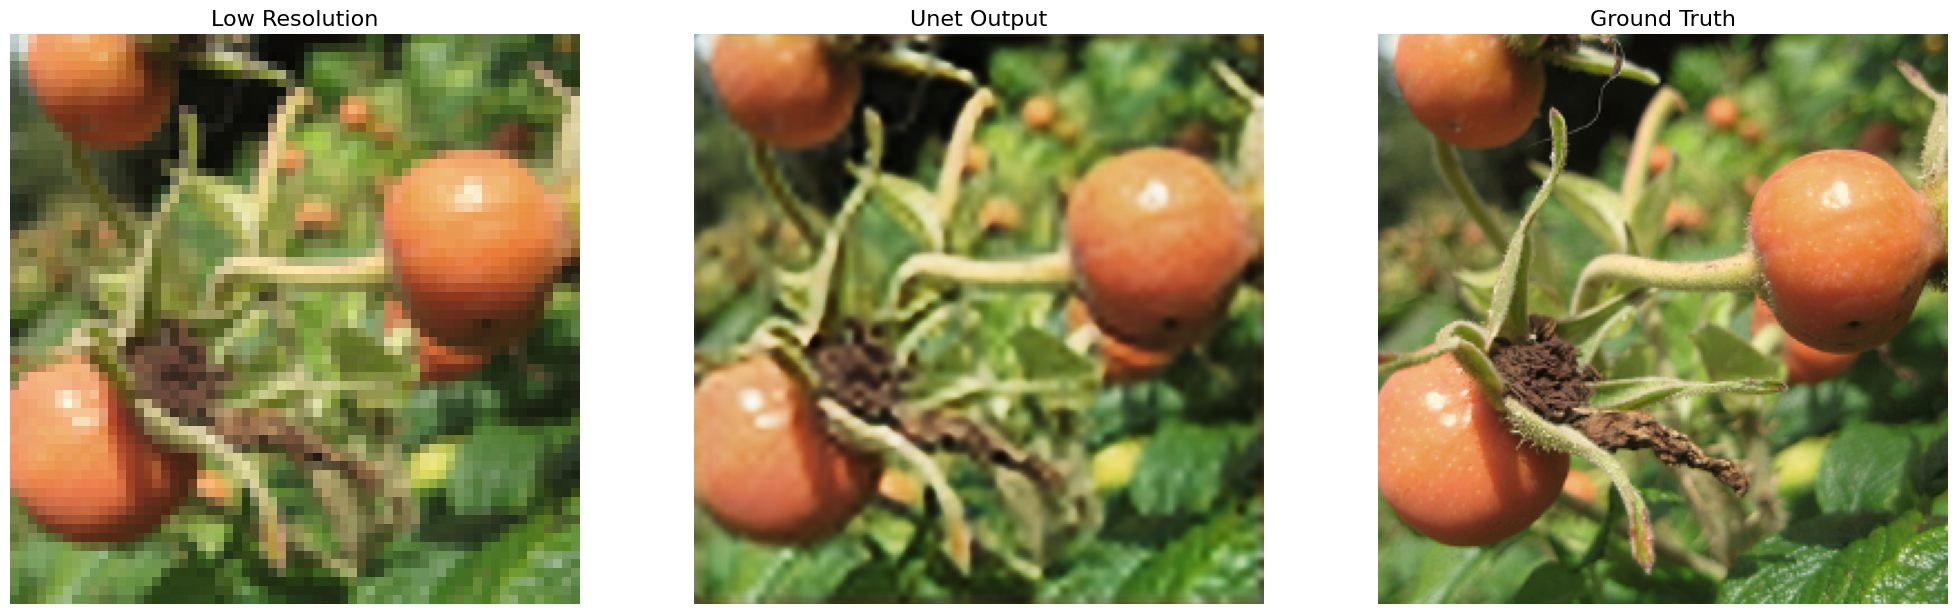

In [47]:
#  Real-World Image super-resolution
"""
!python inference_resshift.py
  --in_path [image folder/image path]
  --out_path [result folder]
  --task realsr
  --scale 4
  --version 3
  --chop_size 512 (GPU memory requirements: 512 --> 20GB, 256 --> 11GB )
"""
"""!python inference_resshift.py -i test/input/bitki_lq.png -o test/output --task realsr --scale 4 --version v3"""

im_lq = imread("test/input/bitki_lq.png")
im_hq = imread("test/output/bitki_lq.png")
im_gt = imread("test/input/bitki_gt.png")
display(im_lq, im_hq, im_gt)

In [49]:
!python train.py --epochs 100 --gpu

train items: 1600
Epoch 1/100
Training...
Epoch 1 finished! - Loss: 0.028014
Checkpoint 1 saved !
Epoch 2/100
Training...
Epoch 2 finished! - Loss: 0.004007
Epoch 3/100
Training...
Epoch 3 finished! - Loss: 0.002424
Epoch 4/100
Training...
Epoch 4 finished! - Loss: 0.001823
Epoch 5/100
Training...
Epoch 5 finished! - Loss: 0.001535
Checkpoint 5 saved !
Epoch 6/100
Training...
Epoch 6 finished! - Loss: 0.001428
Epoch 7/100
Training...
Epoch 7 finished! - Loss: 0.001374
Epoch 8/100
Training...
Epoch 8 finished! - Loss: 0.001341
Epoch 9/100
Training...
Epoch 9 finished! - Loss: 0.001196
Epoch 10/100
Training...
Epoch 10 finished! - Loss: 0.001181
Checkpoint 10 saved !
Epoch 11/100
Training...
Epoch 11 finished! - Loss: 0.001135
Epoch 12/100
Training...
Epoch 12 finished! - Loss: 0.001168
Epoch 13/100
Training...
Epoch 13 finished! - Loss: 0.001093
Epoch 14/100
Training...
Epoch 14 finished! - Loss: 0.001098
Epoch 15/100
Training...
Epoch 15 finished! - Loss: 0.001059
Epoch 16/100
Training

In [50]:
!python train.py --test --pth CP100.pth --gpu

test items: 5
Testing CP100.pth


📂 Output file auto-generated as: test/output/cicek_lq_output.png
✅ Model output saved at: test/output/cicek_lq_output.png


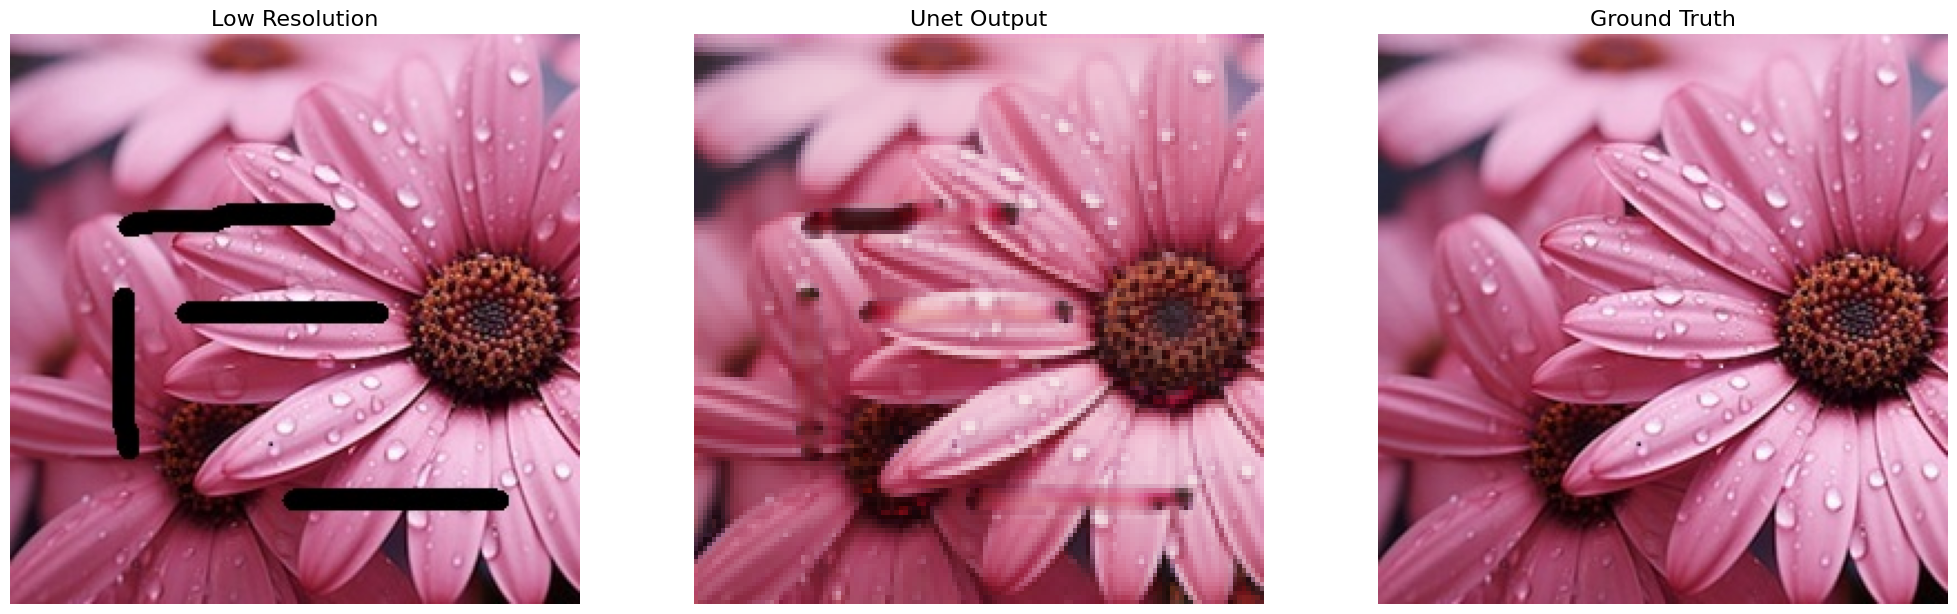

In [55]:
!python inferenceI.py -i test/input/cicek_lq.jpg -o test/output/ -m checkpoints/CP100.pth

im_lq = imread("test/input/cicek_lq.jpg")
im_hq = imread("test/output/cicek_lq_output.png")
im_gt = imread("test/input/cicek_gt.jpg")
display(im_lq, im_hq, im_gt)

In [18]:
import numpy as np
import math

input_image_resized = input_image.resize(output_image.size, Image.BICUBIC)

def calculate_psnr(img1, img2):
    img1 = np.array(img1).astype(np.float32) / 255.0
    img2 = np.array(img2).astype(np.float32) / 255.0
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * math.log10(1.0 / math.sqrt(mse))
    return psnr

# PSNR hesapla
psnr_value = calculate_psnr(input_image_resized, output_image)
print(f"📈 PSNR: {psnr_value:.2f} dB")

📈 PSNR: 33.16 dB


In [28]:
!pip install scikit-image
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(img1, img2):
    img1 = np.array(img1).astype(np.float32) / 255.0
    img2 = np.array(img2).astype(np.float32) / 255.0
    
    min_size = min(img1.shape[0], img1.shape[1])
    win_size = 7 if min_size >= 7 else (min_size if min_size % 2 == 1 else min_size - 1)
    
    ssim_value, _ = ssim(
        img1, img2,
        full=True,
        channel_axis=-1,
        win_size=win_size,
        data_range=1.0  # DÜZELTME BURADA!
    )
    return ssim_value

ssim_value = calculate_ssim(input_image_resized, output_image)

print(f"📈 SSIM: {ssim_value:.4f}")


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
📈 SSIM: 0.8920


In [30]:
!pip install lpips
import lpips
loss_fn = lpips.LPIPS(net='alex') # VGG, AlexNet, SqueezeNet destekliyor

# Tensor tipinde input lazım (NCHW, [-1,1] normalize edilmiş)
img0 = torch.from_numpy(np.array(input_image_resized)).permute(2,0,1).unsqueeze(0).float() / 127.5 - 1
img1 = torch.from_numpy(np.array(output_image)).permute(2,0,1).unsqueeze(0).float() / 127.5 - 1

d = loss_fn(img0, img1)
print(f"LPIPS distance: {d.item():.4f}")


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
LPIPS distance: 0.1584
